In [9]:
import matplotlib
import os
import pandas as pd
import matplotlib.pyplot as plt

Using all_h folder: /Users/xxx/Desktop/warning_suppression/code/data/avg_res_non_rand/all_h
Using all_p folder: /Users/xxx/Desktop/warning_suppression/code/data/avg_res_non_rand/all_p


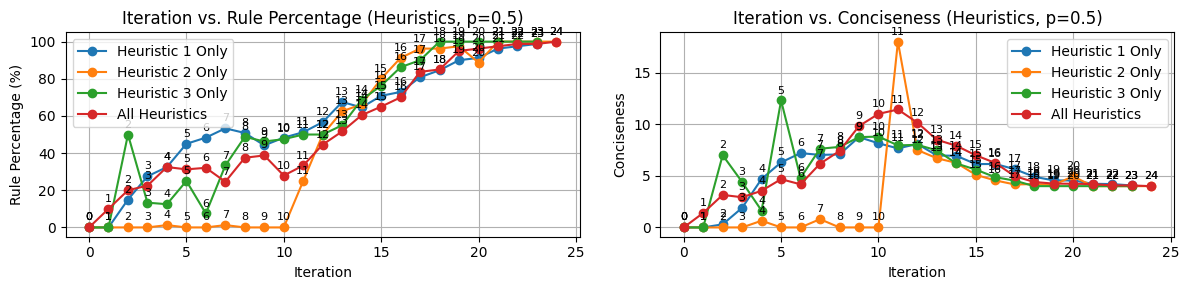

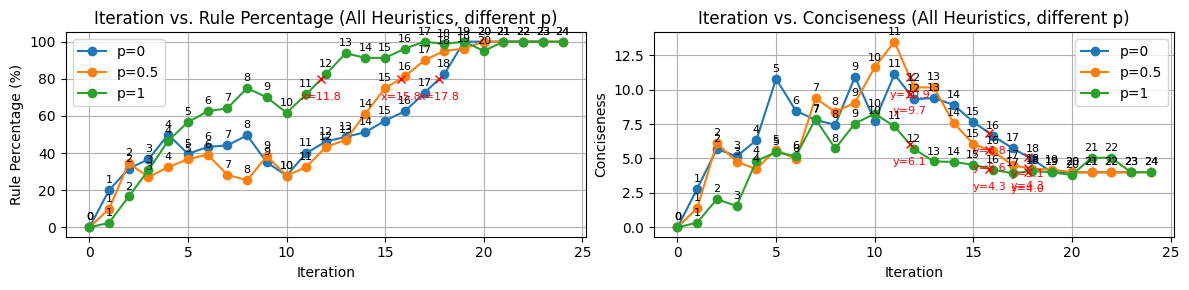

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helper functions
def get_all_x_for_y(x_values, y_values, target=80):
    """
    Returns a list of x values (using linear interpolation) 
    where the y-values cross the given target.
    """
    intersections = []
    for i in range(len(y_values) - 1):
        # Check if target lies between y[i] and y[i+1] (or equals one of them)
        if (y_values[i] - target) * (y_values[i+1] - target) <= 0:
            if y_values[i+1] != y_values[i]:
                x_int = x_values[i] + (target - y_values[i]) / (y_values[i+1] - y_values[i]) * (x_values[i+1] - x_values[i])
                intersections.append(x_int)
            else:
                intersections.append(x_values[i])
    return intersections

def get_y_for_x(x_target, x_values, y_values):
    """
    Returns the y value (using linear interpolation) at x_target,
    given x_values and corresponding y_values.
    """
    for i in range(len(x_values) - 1):
        if x_values[i] <= x_target <= x_values[i+1]:
            if x_values[i+1] != x_values[i]:
                y_int = y_values[i] + (x_target - x_values[i]) / (x_values[i+1] - x_values[i]) * (y_values[i+1] - y_values[i])
            else:
                y_int = y_values[i]
            return y_int
    return None

# --- Define absolute paths relative to this script or current working directory ---
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # __file__ is not defined, e.g., in interactive environments like Jupyter Notebook.
    script_dir = os.getcwd()

data_dir = os.path.join(script_dir, 'data', 'avg_res_non_rand')
all_h_folder = os.path.join(data_dir, 'all_h')
all_p_folder = os.path.join(data_dir, 'all_p')

print("Using all_h folder:", all_h_folder)
print("Using all_p folder:", all_p_folder)

###############################
# Process the all_h folder data
###############################
results_all_h = {}  # {scenario: {iteration: {'Rule Percentage': [], 'Conciseness': []}}}

for filename in os.listdir(all_h_folder):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(all_h_folder, filename))
        for _, row in df.iterrows():
            scenario = row['Scenario']
            iteration = int(row['Iteration'])
            rule_percentage = row['Rule Percentage']
            conciseness = row['Conciseness']

            if scenario not in results_all_h:
                results_all_h[scenario] = {}
            if iteration not in results_all_h[scenario]:
                results_all_h[scenario][iteration] = {'Rule Percentage': [], 'Conciseness': []}
            results_all_h[scenario][iteration]['Rule Percentage'].append(rule_percentage)
            results_all_h[scenario][iteration]['Conciseness'].append(conciseness)

averaged_all_h = {}  # {scenario: {iteration: {'Rule Percentage': avg, 'Conciseness': avg}}}
for scenario, iterations in results_all_h.items():
    averaged_all_h[scenario] = {}
    for iteration, metrics in iterations.items():
        avg_rule = np.mean(metrics['Rule Percentage'])
        avg_conc = np.mean(metrics['Conciseness'])
        averaged_all_h[scenario][iteration] = {'Rule Percentage': avg_rule, 'Conciseness': avg_conc}

#################################
# Process the all_p folder data
#################################
results_all_p = {}  # {probability: {iteration: {'Rule Percentage': [], 'Conciseness': []}}}

for filename in os.listdir(all_p_folder):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(all_p_folder, filename))
        for _, row in df.iterrows():
            probability = row['Probability']
            iteration = int(row['Iteration'])
            rule_percentage = row['Rule Percentage']
            conciseness = row['Conciseness']

            if probability not in results_all_p:
                results_all_p[probability] = {}
            if iteration not in results_all_p[probability]:
                results_all_p[probability][iteration] = {'Rule Percentage': [], 'Conciseness': []}
            results_all_p[probability][iteration]['Rule Percentage'].append(rule_percentage)
            results_all_p[probability][iteration]['Conciseness'].append(conciseness)

averaged_all_p = {}
for probability, iterations in results_all_p.items():
    averaged_all_p[probability] = {}
    for iteration, metrics in iterations.items():
        avg_rule = np.mean(metrics['Rule Percentage'])
        avg_conc = np.mean(metrics['Conciseness'])
        averaged_all_p[probability][iteration] = {'Rule Percentage': avg_rule, 'Conciseness': avg_conc}

###############################
# Plotting for the all_h data
###############################
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

for scenario, data in averaged_all_h.items():
    iterations_sorted = sorted(data.keys())
    rule_values = [data[i]['Rule Percentage'] for i in iterations_sorted]
    conc_values = [data[i]['Conciseness'] for i in iterations_sorted]
    
    axs[0].plot(iterations_sorted, rule_values, marker='o', label=scenario)
    axs[1].plot(iterations_sorted, conc_values, marker='o', label=scenario)
    
    for x, y in zip(iterations_sorted, rule_values):
         axs[0].annotate(str(x), (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    for x, y in zip(iterations_sorted, conc_values):
         axs[1].annotate(str(x), (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

axs[0].set_title('Iteration vs. Rule Percentage (Heuristics, p=0.5)')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Rule Percentage (%)')
axs[0].grid(True)
axs[0].legend()

axs[1].set_title('Iteration vs. Conciseness (Heuristics, p=0.5)')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Conciseness')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(script_dir, 'averaged_results_all_h.pdf'))

###############################
# Plotting for the all_p data
###############################
# First, compute the union of intersection x-values (where rule percentage equals 80) from all curves.
all_intersections = []
for probability, data in averaged_all_p.items():
    iterations_sorted = sorted(data.keys())
    rule_values = [data[i]['Rule Percentage'] for i in iterations_sorted]
    intersections = get_all_x_for_y(iterations_sorted, rule_values, target=80)
    all_intersections.extend(intersections)
unique_intersections = sorted(set(all_intersections))

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Plot the Rule Percentage curves (left graph)
for probability, data in averaged_all_p.items():
    iterations_sorted = sorted(data.keys())
    rule_values = [data[i]['Rule Percentage'] for i in iterations_sorted]
    axs[0].plot(iterations_sorted, rule_values, marker='o', label=probability)
    for x, y in zip(iterations_sorted, rule_values):
         axs[0].annotate(str(x), (x, y), textcoords="offset points", xytext=(0,5), ha="center", fontsize=8)

# Mark all intersection points (union) on the left graph.
for x_int in unique_intersections:
    axs[0].plot(x_int, 80, marker='x', color='red')
    axs[0].annotate(f"x={x_int:.1f}", (x_int, 80), textcoords="offset points", xytext=(0,-15), ha="center", fontsize=8, color="red")

axs[0].set_title('Iteration vs. Rule Percentage (All Heuristics, different p)')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Rule Percentage (%)')
axs[0].grid(True)
axs[0].legend()

# Plot the Conciseness curves (right graph)
for probability, data in averaged_all_p.items():
    iterations_sorted = sorted(data.keys())
    conc_values = [data[i]['Conciseness'] for i in iterations_sorted]
    axs[1].plot(iterations_sorted, conc_values, marker='o', label=probability)
    for x, y in zip(iterations_sorted, conc_values):
         axs[1].annotate(str(x), (x, y), textcoords="offset points", xytext=(0,5), ha="center", fontsize=8)
    # For each unique intersection x, compute and mark the corresponding conciseness value on this curve.
    for x_int in unique_intersections:
         conc_at_x = get_y_for_x(x_int, iterations_sorted, conc_values)
         if conc_at_x is not None:
             axs[1].plot(x_int, conc_at_x, marker='x', color='red')
             axs[1].annotate(f"y={conc_at_x:.1f}", (x_int, conc_at_x), textcoords="offset points", xytext=(0,-15), ha="center", fontsize=8, color="red")

axs[1].set_title('Iteration vs. Conciseness (All Heuristics, different p)')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Conciseness')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(script_dir, 'averaged_results_all_p.pdf'))


Using all_h folder: /Users/xxx/Desktop/warning_suppression/code/data/avg_res_non_rand/all_h
Using all_p folder: /Users/xxx/Desktop/warning_suppression/code/data/avg_res_non_rand/all_p


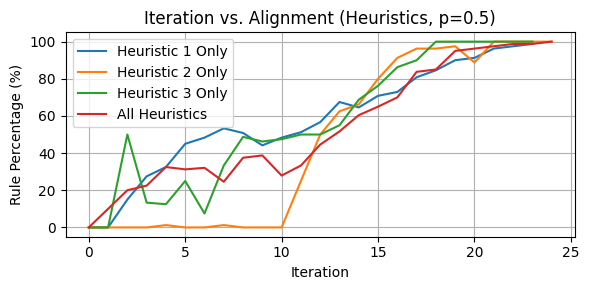

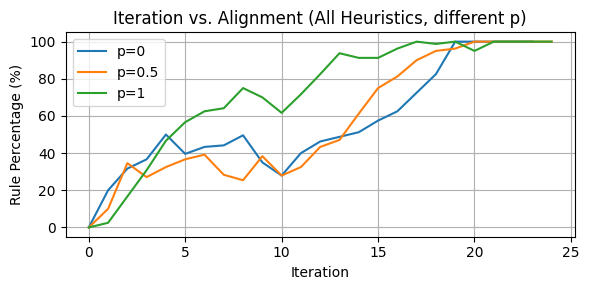

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Define absolute paths relative to this script or current working directory ---
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # __file__ is not defined, e.g., in interactive environments like Jupyter Notebook.
    script_dir = os.getcwd()

# Define the base data directory relative to the script's location.
data_dir = os.path.join(script_dir, 'data', 'avg_res_non_rand')

# Construct absolute paths to the subdirectories.
all_h_folder = os.path.join(data_dir, 'all_h')
all_p_folder = os.path.join(data_dir, 'all_p')

print("Using all_h folder:", all_h_folder)
print("Using all_p folder:", all_p_folder)

###############################
# Process the all_h folder data
###############################
# Each CSV file in all_h (20 runs) has one probability (p=0.5) and multiple heuristics.
# Group by scenario (heuristic) and iteration, then average the values.

results_all_h = {}  # {scenario: {iteration: {'Rule Percentage': [], 'Conciseness': []}}}

for filename in os.listdir(all_h_folder):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(all_h_folder, filename))
        for _, row in df.iterrows():
            scenario = row['Scenario']  # e.g. "Heuristic 1 Only", "Heuristic 2 Only", etc.
            iteration = int(row['Iteration'])
            rule_percentage = row['Rule Percentage']
            conciseness = row['Conciseness']

            if scenario not in results_all_h:
                results_all_h[scenario] = {}
            if iteration not in results_all_h[scenario]:
                results_all_h[scenario][iteration] = {'Rule Percentage': [], 'Conciseness': []}
            
            results_all_h[scenario][iteration]['Rule Percentage'].append(rule_percentage)
            results_all_h[scenario][iteration]['Conciseness'].append(conciseness)

# Compute the averages per iteration for each scenario
averaged_all_h = {}  # {scenario: {iteration: {'Rule Percentage': avg, 'Conciseness': avg}}}
for scenario, iterations in results_all_h.items():
    averaged_all_h[scenario] = {}
    for iteration, metrics in iterations.items():
        avg_rule = np.mean(metrics['Rule Percentage'])
        avg_conc = np.mean(metrics['Conciseness'])
        averaged_all_h[scenario][iteration] = {'Rule Percentage': avg_rule, 'Conciseness': avg_conc}

#################################
# Process the all_p folder data
#################################
# Each CSV file in all_p (20 runs) has one heuristic ("All Heuristics") but different p values.
# Group by probability and iteration, then average the values.

results_all_p = {}  # {probability: {iteration: {'Rule Percentage': [], 'Conciseness': []}}}

for filename in os.listdir(all_p_folder):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(all_p_folder, filename))
        for _, row in df.iterrows():
            probability = row['Probability']  # e.g. "p=0", "p=0.5", "p=1"
            iteration = int(row['Iteration'])
            rule_percentage = row['Rule Percentage']
            conciseness = row['Conciseness']

            if probability not in results_all_p:
                results_all_p[probability] = {}
            if iteration not in results_all_p[probability]:
                results_all_p[probability][iteration] = {'Rule Percentage': [], 'Conciseness': []}
            
            results_all_p[probability][iteration]['Rule Percentage'].append(rule_percentage)
            results_all_p[probability][iteration]['Conciseness'].append(conciseness)

# Compute averages per iteration for each probability
averaged_all_p = {}
for probability, iterations in results_all_p.items():
    averaged_all_p[probability] = {}
    for iteration, metrics in iterations.items():
        avg_rule = np.mean(metrics['Rule Percentage'])
        avg_conc = np.mean(metrics['Conciseness'])
        averaged_all_p[probability][iteration] = {'Rule Percentage': avg_rule, 'Conciseness': avg_conc}

###############################
# Plotting for the all_h data (only Rule Percentage)
###############################
fig, ax = plt.subplots(figsize=(6, 3))

for scenario, data in averaged_all_h.items():
    iterations_sorted = sorted(data.keys())
    rule_values = [data[i]['Rule Percentage'] for i in iterations_sorted]
    
    # Plot without markers
    ax.plot(iterations_sorted, rule_values, label=scenario)

ax.set_title('Iteration vs. Alignment (Heuristics, p=0.5)')
ax.set_xlabel('Iteration')
ax.set_ylabel('Rule Percentage (%)')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(script_dir, 'averaged_results_all_h.pdf'))

###############################
# Plotting for the all_p data (only Rule Percentage)
###############################
fig, ax = plt.subplots(figsize=(6, 3))

for probability, data in averaged_all_p.items():
    iterations_sorted = sorted(data.keys())
    rule_values = [data[i]['Rule Percentage'] for i in iterations_sorted]
    
    # Plot without markers
    ax.plot(iterations_sorted, rule_values, label=probability)

ax.set_title('Iteration vs. Alignment (All Heuristics, different p)')
ax.set_xlabel('Iteration')
ax.set_ylabel('Rule Percentage (%)')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(script_dir, 'averaged_results_all_p.pdf'))
